In [19]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib as plt


In [3]:
diamonds = pd.read_csv('./data/diamonds_train.csv.zip')
diamonds_pred = pd.read_csv('./data/diamonds_predict.csv')

In [4]:
diamonds_pred.head()

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,0.79,Very Good,F,SI1,62.7,60.0,5.82,5.89,3.67
1,1,1.20,Ideal,J,VS1,61.0,57.0,6.81,6.89,4.18
2,2,1.57,Premium,H,SI1,62.2,61.0,7.38,7.32,4.57
3,3,0.90,Very Good,F,SI1,63.8,54.0,6.09,6.13,3.90
4,4,0.50,Very Good,F,VS1,62.9,58.0,5.05,5.09,3.19


In [6]:
diamonds.describe() #min in x, z, y not possible

,carat,depth,table,price,x,y,z
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,0.797706,61.752841,57.446133,3928.444469,5.729392,5.732819,3.537154
std,0.475544,1.431725,2.233535,3992.416147,1.124453,1.146650,0.697062
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,945.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2397.000000,5.690000,5.710000,3.520000
75%,1.040000,62.500000,59.000000,5331.000000,6.540000,6.540000,4.035000
max,4.500000,79.000000,95.000000,18823.000000,10.230000,58.900000,8.060000


In [15]:
len(diamonds[(diamonds['x']==0) | (diamonds['y']==0) |(diamonds['z']==0)])

## only 16 equal to zero so I'll let them there since it is too small of a number.

16

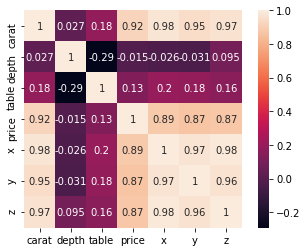

In [13]:
corr  = diamonds.corr()
sns.heatmap(data=corr, square= True, annot=True, cbar=True)

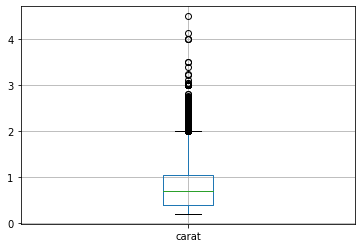

In [6]:
diamonds['carat'].plot(kind='box', grid=True);

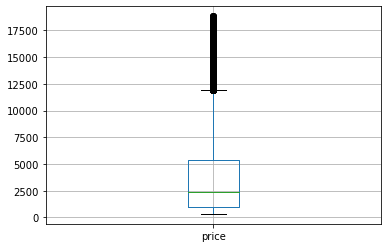

In [9]:
diamonds['price'].plot(kind='box', grid=True);

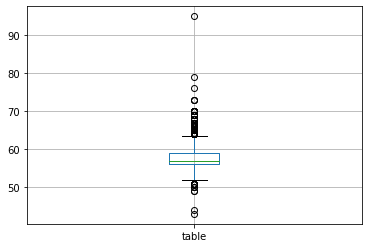

In [10]:
diamonds['table'].plot(kind='box', grid=True);

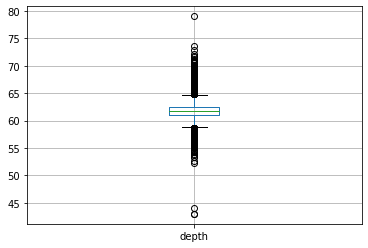

In [11]:
diamonds['depth'].plot(kind='box', grid=True);

## NEW FEATURE VOLUME

In [17]:
diamonds['volume'] = diamonds['x']*diamonds['y']*diamonds['z']
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25,197.096725
1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75,52.395750
2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65,113.436890
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00,66.268800
4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95,168.429975


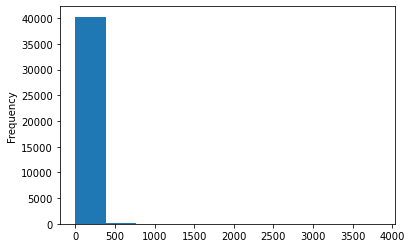

In [25]:
diamonds['volume'].plot(kind='hist')

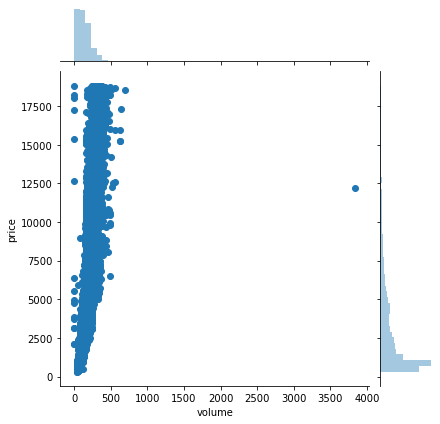

In [28]:
sns.jointplot(x='volume', y='price', data=diamonds, size=6)

,carat,cut,color,clarity,depth,table,price,volume
0,1.21,Premium,J,VS2,62.4,58.0,4268,197.096725
1,0.32,Very Good,H,VS2,63.0,57.0,505,52.395750
2,0.71,Fair,G,VS1,65.5,55.0,2686,113.436890
3,0.41,Good,D,SI1,63.8,56.0,738,66.268800
4,1.02,Ideal,G,SI1,60.5,59.0,4882,168.429975


In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


model = DecisionTreeClassifier(max_depth=70, criterion='entropy', min_samples_leaf=1000)
X_train, X_test, y_train, y_test = train_test_split(diamonds)

ValueError: not enough values to unpack (expected 4, got 2)